In [1]:
import os
import sys
import math
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

from tqdm.notebook import tqdm

C:\Users\joy4m\AppData\Local\Temp\ipykernel_111544\1371457254.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


## Import Torch

In [2]:
import torch
print(torch.__version__)

2.4.1+cu121


In [3]:
torch.manual_seed(42)

## Tensor Basics

### 1D tensor

In [4]:
x = torch.tensor([1, 2, 3])
print(x)
print(f"x type: {type(x)}")
print(f"rank of x: {x.dim()}")
print(f"shape of x: {x.shape}")

tensor([1, 2, 3])
x type: <class 'torch.Tensor'>
rank of x: 1
shape of x: torch.Size([3])


### 2D tensor

In [5]:
y  = torch.tensor([[1,2,3], 
                  [4,5,6]])
print(y)
print(f"y type: {type(y)}")
print(f"rank of y: {y.dim()}")
print(f"shape of y: {y.shape}")

tensor([[1, 2, 3],
        [4, 5, 6]])
y type: <class 'torch.Tensor'>
rank of y: 2
shape of y: torch.Size([2, 3])


### Tensor construct

In [6]:
# torch.rand : Create a tensor with uniform random numbers
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)

print(f"x1: {x1}")
print(f"x2: {x2}")

print(f"x1 + x2: {x1 + x2}")

x1: tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
x2: tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])
x1 + x2: tensor([[1.1388, 1.7086, 1.3236],
        [1.0925, 1.3250, 1.1945]])


In [7]:
# torch.zeros : Create a tensor with all zeros
x = torch.zeros(2, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# torch.ones : Create a tensor with all ones
x = torch.ones(2, 3)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


## Indexing

In [9]:
x = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

print(f"x: {x}")
print(f"First column of x: {x[:, 0]}")
print(f"Second row of x: {x[1]}")
print(f"First two rows with last column of x: {x[:2, -1]}")

x: tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
First column of x: tensor([1, 4, 7])
Second row of x: tensor([4, 5, 6])
First two rows with last column of x: tensor([3, 6])


## Change shape

In [10]:
x = torch.arange(6)
print(f"x: {x}")

x: tensor([0, 1, 2, 3, 4, 5])


In [11]:
x = x.view(3,2)
print(f"x: {x}")

x: tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [12]:
x = x.permute(1,0) # Change dimension 1 and 0
print(f"x: {x}")

x: tensor([[0, 2, 4],
        [1, 3, 5]])


## Operations

In [13]:
x = torch.tensor([1, 2, 3])
print(f"x: {x}")
y = torch.tensor([4, 5, 6])
print(f"y: {y}")

print(f"x + y: {x + y}")
print(f"x - y: {x - y}")
print(f"x * y: {x * y}") # Element-wise multiplication
print(f"x @ y: {x @ y}") # Dot product (In general, the number of columns in x must match the number of rows in y, but PyTorch can handle broadcasting in certain cases.)

x: tensor([1, 2, 3])
y: tensor([4, 5, 6])
x + y: tensor([5, 7, 9])
x - y: tensor([-3, -3, -3])
x * y: tensor([ 4, 10, 18])
x @ y: 32


## Backpropagation

In [14]:
!pip install torchviz
from torchviz import make_dot

$$
y = \frac{1}{N}\sum_i \left[(x + 1)^3 + 2\right]
$$

y: 14.0


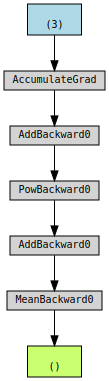

In [15]:
x = torch.arange(3, dtype=torch.float, requires_grad=True) # only float type can have gradients
a = x + 1
b = a ** 3
c = b + 2
y = c.mean()
print(f"y: {y}")
make_dot(y)

In [16]:
y.backward()
print(f"x.grad: {x.grad}")

x.grad: tensor([1., 4., 9.])


We can calculate the gradient like this,

$$
\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}
$$

and the gradient is
$$
\frac{\partial a_i}{\partial x_i} = 1, \quad \frac{\partial b_i}{\partial a_i} = 3\cdot a_i^2, \quad \frac{\partial c_i}{\partial b_i} = 1, \quad \frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Thus, the input is $\mathbf{x} = [0,1,2]$, and our gradient is $\partial y/\partial x = [1, 4, 9]$

## Use Gpu

In [17]:
gpu = torch.cuda.is_available()
print(f"GPU available: {gpu}")

GPU available: True


To use GPU in PyTorch, tensors must be sent to the GPU using `to(device)`.

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
x = torch.tensor([1, 2, 3])
print(f"Tensor on {device}: {x}")

x = x.to(device)
print(f"Tensor on {device}: {x}")

Tensor on cuda: tensor([1, 2, 3])
Tensor on cuda: tensor([1, 2, 3], device='cuda:0')


In [20]:
x = torch.randn(10000, 10000)

# Cpu time
t_0 = time.time()
for _ in range(10):
    y = x @ x
t_1 = time.time()
print(f"Time on CPU: {t_1 - t_0}")

# Gpu time
x = x.to(device)
t_0 = time.time()
for _ in range(10):
    y = x @ x
t_1 = time.time()
print(f"Time on GPU: {t_1 - t_0}")

Time on CPU: 12.15792441368103
Time on GPU: 0.06451225280761719
